<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment11/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textmining3
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import csv
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [ ]:
elon_musk = pd.read_csv('Elon_musk.csv',encoding="latin-1")
elon_musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
# select few text
elon_musk=elon_musk.iloc[:1000,]
elon_musk.shape

(1000, 2)

**Number of words**

In [ ]:
# Number of words in single tweets"
elon_musk['word_count']=elon_musk['Text'].apply(lambda x: len(str(x).split(" ")))
elon_musk[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


**Number of Characters**

In [ ]:
# number of the character in the single tweet
elon_musk['char_count']=elon_musk['Text'].str.len()
elon_musk[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


**Average word length**



In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

elon_musk['avg_word'] = elon_musk['Text'].apply(lambda x: avg_word(x))
elon_musk[['Text','avg_word']].head()


,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


**Number of Stopwords**

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop=stopwords.words('english')

elon_musk['stopwords'] = elon_musk['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon_musk[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


**Number of Special Character**

In [ ]:
elon_musk['hastags']=elon_musk['Text'].apply(lambda x:len([x for x in x.split() if x.startswith('@')]))
elon_musk[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


**Number of Numerics**

In [ ]:
elon_musk['numerics']=elon_musk['Text'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
elon_musk[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


**Number of Upper case word**

In [ ]:
elon_musk['upper']=elon_musk['Text'].apply(lambda x:len([x for x in x.split() if x.isupper()]))
elon_musk[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# **Pre-processing**

**Lower Case**

In [ ]:
elon_musk['Text']=elon_musk['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
elon_musk[['Text']].head()

,Text
0,@kunalb11 im an alien
1,@id_aa_carmack ray tracing on cyberpunk with h...
2,@joerogan @spotify great interview!
3,@gtera27 doge is underestimated
4,@teslacn congratulations tesla china for amazi...


**Removing Punctuations**



In [ ]:
elon_musk['Text']=elon_musk['Text'].str.replace('[^\w\s]','')
elon_musk['Text'].head()

<ipython-input-22-0dcc7e488b2a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  elon_musk['Text']=elon_musk['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

**Removal of stopwords**

In [ ]:
stop=stopwords.words('english')
elon_musk['Text']=elon_musk['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
elon_musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

**Common word removal**

In [ ]:
freq = pd.Series(' '.join(elon_musk['Text']).split()).value_counts()[:15]
freq

spacex             119
amp                 98
tesla               69
erdayastronaut      68
rt                  64
flcnhvy             46
teslaownerssv       44
ppathole            43
yes                 42
great               41
launch              30
good                27
space_station       22
would               22
nasaspaceflight     22
dtype: int64

In [ ]:
freq=list(freq.index)
elon_musk['Text']=elon_musk['Text'].apply(lambda x:' '.join( x for x in x.split() if x not in freq))
elon_musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

**Rare words removal**

In [ ]:
freq = pd.Series(' '.join(elon_musk['Text']).split()).value_counts()[-10:]
freq

incremental           1
httpstco07puoramgo    1
charlie               1
poses                 1
hazard                1
viasats               1
profits               1
sneaky                1
moves                 1
httpstco4qrymb7ii0    1
dtype: int64

In [ ]:
freq = list(freq.index)
elon_musk['Text'] = elon_musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
elon_musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

**Spelling Correction**

In [ ]:
elon_musk['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

**Tokenization**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
TextBlob(elon_musk['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
st=PorterStemmer()
elon_musk['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

# **Advanced Text Processing**

**N-Grams**

In [ ]:
TextBlob(elon_musk['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

**Term Frequency**

In [ ]:
tf1 = (elon_musk['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


**Inverse Document Frequency**

In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(elon_musk.shape[0]/(len(elon_musk[elon_musk['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.828314
1,ray,1,5.809143
2,tracing,1,6.907755
3,cyberpunk,1,4.422849
4,hdr,1,6.214608
5,nextlevel,1,6.907755
6,tried,1,6.214608


**Term Frequency - Inverse Document frequency**

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.828314,4.828314
1,ray,1,5.809143,5.809143
2,tracing,1,6.907755,6.907755
3,cyberpunk,1,4.422849,4.422849
4,hdr,1,6.214608,6.214608
5,nextlevel,1,6.907755,6.907755
6,tried,1,6.214608,6.214608


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(elon_musk['Text'])
vect

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3720 stored elements in Compressed Sparse Row format>

**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
elon_musk_bow = bow.fit_transform(elon_musk['Text'])
elon_musk_bow

<1000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4067 stored elements in Compressed Sparse Row format>

# **Word Cloud**

In [ ]:
elon_musk.head()

,Unnamed: 0,Text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,1,kunalb11 im alien,4,22,4.750000,1,1,0,0
1,2,id_aa_carmack ray tracing cyberpunk hdr nextle...,13,82,5.384615,4,1,0,1
2,3,joerogan spotify interview,4,35,8.000000,0,2,0,0
3,4,gtera27 doge underestimated,4,31,7.000000,1,1,0,0
4,5,teslacn congratulations china amazing executio...,17,104,5.176471,5,1,0,0


In [ ]:
elon_musk.isna().sum()

Unnamed: 0    0
Text          0
word_count    0
char_count    0
avg_word      0
stopwords     0
hastags       0
numerics      0
upper         0
dtype: int64

In [ ]:
text = " ".join(Text for Text in elon_musk.Text)

In [ ]:
# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

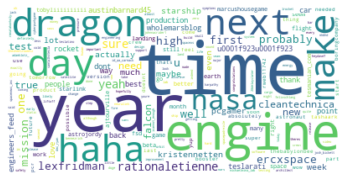

In [ ]:
# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

# **Sentimental Analysis**

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
from pandas._libs.algos import take_2d_axis0_int64_float64
text_1 = "kunalb11 im alien	"
text_2 = "id_aa_carmack ray tracing cyberpunk hdr nextle...	"
text_3 = "joerogan spotify interview"
text_4 = "gtera27 doge underestimated	"
text_5 = "teslacn congratulations china amazing executio..."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
sent_3 = sentiment.polarity_scores(text_3)
sent_4 = sentiment.polarity_scores(text_4)
sent_5 = sentiment.polarity_scores(text_5)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)
print("Sentiment of text 3:", sent_3)
print("Sentiment of text 4:", sent_4)
print("Sentiment of text 5:", sent_5)

Sentiment of text 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment of text 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment of text 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment of text 4: {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}
Sentiment of text 5: {'neg': 0.0, 'neu': 0.28, 'pos': 0.72, 'compound': 0.8271}


# **Perform Emotion Mining**

In [ ]:
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 829 kB 3.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491071 sha256=6f60bb2e65ce369db9778534d7446af0b259e6f00c339e3c95fea2407926cbef
  Stored in directory: /root/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
import re
import copy
import collections
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib

%matplotlib inline


In [ ]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import codecs

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

﻿;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence express

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [ ]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

ï»¿;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence exp

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop (1).txt


In [ ]:
with codecs.open("stop (1).txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

ï»¿a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
exam